## Initial EDA of the data

In [3]:
## Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the data
df = pd.read_csv("train.csv")
df.shape

(404290, 6)

In [3]:
# Selecting a random sample of the data to look:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
253899,253899,172460,368522,How can I exchange my OnePlus 3 (15days old) f...,Why can't I buy the OnePlus 3T 128GB in Canada...,0
243975,243975,356512,356513,What is self energiz brake? And When dose brak...,Which one is best drum brake or disc brake?,0
218836,218836,325567,325568,Is there anyone working for Airtel customer ca...,If Ghost Rider used the Penance Stare on Cthul...,0
149969,149969,236123,39703,How can open new cell tower over land in India?,What should I do to get cellular companies to ...,1
203170,203170,157897,20290,How can I learn C#?,How can I master C#?,1
181295,181295,277757,277758,What is your creepiest picture you have seen?,What are the creepiest pictures?,1
334953,334953,462191,462192,How does Deepmind Lab and OpenAI Universe comp...,What are the differences and similarities betw...,0
310084,310084,10218,179496,What trivia (and/or little-known facts) do you...,What trivia (and/or little-known facts) do you...,0
8085,8085,15770,15771,What topics have recognized topic biographies?...,Should I set a Short Bio and Topic-Specific Bi...,0
294003,294003,415821,415822,Have you ever wanted to kill someone?,Did you ever want to kill someone?,0


### Data Description:

We have 6 columns -> id,qid1,qid2,question1,question2,is_duplicate.

#### Data Type:

int: id,qid1,qid2,is_duplicate

object: question1,question2

#### Column description:

id: unique number to a specific pair of question.

qid1: id for question1

qid2: id for question2

question1: A string value containing quesion 1.

question2: A string value containing quesion 2.

is_duplicate: Boolean value represnting 1 - duplicate :: 0 - not duplicate

In [4]:
## Information of the entire dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [5]:
# missing values in each column
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

We can see we have 1 missing value in question1 and 2 in question2. As our data contain approx 4lakh rows, dropping 3 rows won't affect our anaysis. 

In [6]:
# duplicate rows count
df.duplicated().sum()

0

0    255027
1    149263
Name: is_duplicate, dtype: int64
0    63.080215
1    36.919785
Name: is_duplicate, dtype: float64


<AxesSubplot:>

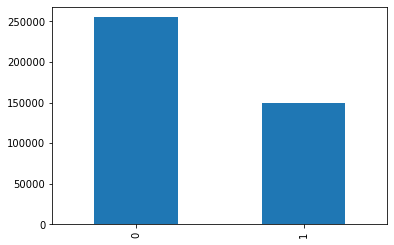

In [7]:
# Distribution of duplicate and non-duplicate questions

print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

In [8]:
# Repeated questions in our dataset:

qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print(f'Number of unique questions: {np.unique(qid).shape[0]}')
x = qid.value_counts()>1
print(f'Number of questions getting repeated: {x[x].shape[0]}')

Number of unique questions: 537933
Number of questions getting repeated: 111780


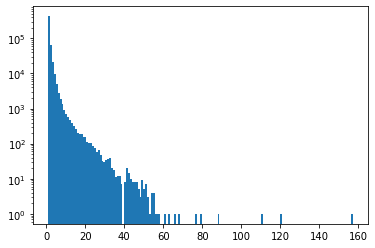

In [9]:
# Repeated questions histogram

plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

The above graph shows that, the count of zero repeated question is high, which is good sign to proceed forward. If we had more number of repeated questions then we had to remove the repeating ones.

## Applying only Bag of Words method:

As we saw, we have a huge dataset, due to computational time and memory constraint,i am selecting a sample of data by random sampling.

In [22]:
# Selecting a sample of the data by keeping the original data safe:
new_df = df.sample(30000,random_state=2)

In [23]:
# checking for null values in each column:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

We have previously encountered null values in two of the columns i.e., question1 and quesion2 column. We had discussed to drop them in future, but here in our sample, there aren't any null values, so we can proceed whithout dropping any columns.

In [24]:
# Selecting only question columns and forming a dataframe:

ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
398782,What is the best marketing automation tool for...,What is the best marketing automation tool for...
115086,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...
327711,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...
367788,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...
151235,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...


In [25]:
# Applying countvectorizer:

from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [26]:
# Now we are forming one single dataframe:

temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(30000, 6000)

(30000, 6000): Here, 30,000 is the rows of data we have selected for the sample.

6000: It is the bag of words of two question columns i.e., 3000(q1)+3000(q2).

Why 300? 

cv = CountVectorizer(max_features=3000): Here in this line we had mentioned  max_features=3000.

In [27]:
temp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
398782,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
115086,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
327711,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
367788,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
151235,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# Adding the is_duplicate to the temp_df contaning bag of words
temp_df['is_duplicate'] = new_df['is_duplicate']

In [17]:
# Let us now divide the dataset to train and test data:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(temp_df.iloc[:,0:-1].values,temp_df.iloc[:,-1].values,test_size=0.2,random_state=1)

As a basic approach, we will first try to build an initial model without any tweeking.

#### Initial model:

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7511666666666666

In [20]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

[12:25:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.7325

With out performing any feature engineering we got 75.11% for random forest and 73.25% for XGBoost as accuracy score. So, we got sure that, the accuracy must not fall below 70% atleast. We can perform some feature engineering above it to increase the accuracy.